In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section of the report, I will load the data, check for cleanliness and then trim and clean the dataset for analysis.

In [ ]:
# Loading the whole data and printig some of them.
data_frame = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
data_frame.head()

In [4]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Exploring the shape of the whole data
print(f"The whole Data cosites of {data_frame.shape} Rows and Columns.")

The whole Data cosites of (110527, 14) Rows and Columns.


In [1]:
df.isna().sum()

NameError: name 'df' is not defined

The dataset has no missing data. It contains 110,527 data entries.
Next check for number of rows and columns:

In [6]:
# Check the quality of the data
duplicate_value = data_frame.duplicated().sum()
if duplicate_value == 0:
    print("Wow! There is no Duplicates.")
else:
    print(duplicate_value)

Wow! There is no Duplicates.


In [7]:
# Checking if there is Duplication in the Patients_id.
unique_value = data_frame["PatientId"].nunique()
print(f"The unique valuse is {unique_value} from the Whole Patients ids'")

# The number of Duplicated ids.'
duplicated_value = data_frame["PatientId"].duplicated().sum()
print(f"duplicated patients' ids are {duplicated_value}")

The unique valuse is 62299 from the Whole Patients ids'
duplicated patients' ids are 48228


There seems to be 62,299 patients in the dataset who had 110527 scheduled appointments. Next check for duplicated data:

In [1]:
# The patients booked one more than time and didn't come?
book_with_noshow = data_frame.duplicated(["PatientId","No-show" == "No"]).sum()
print(f"The number of booking with no show is{book_with_noshow}")

NameError: name 'data_frame' is not defined

In [9]:
# For now it's time to check if there is a missing value:
missing_value = data_frame.info()
missing_value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Now it's time to show some insights like:
# Five-number summary
# Mean and Standerd Diviation
insight = data_frame.describe()
insight

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# The previous negative age (-1) doesn't exist. I can accept zero age as a newborn!
mask = data_frame.query('Age == "-1"')
mask
# Okay! that doen't make any problem there is one patient in negative value
mask = df.query('Age == "0"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [24]:
# I will change the headers of the whole data to be more familiar with programming

edit_column_name ={"PatientId":"patient_id","AppointmentID":"appointment_id","Gender":"gender","ScheduledDay":"scheduled_day","AppointmentDay":"appointment_day","Age":"age","Neighbourhood":"neighborhood","Scholarship":"scholarship","Diabetes":"diabetes","Alcoholism":"alcoholism","Handcap":"handcap","SMS_received":"sms_received","No-show":"no_show","Hipertension":"hypertension"}
data_frame.rename(columns= edit_column_name, inplace=True)
data_frame.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Removing duplicated ids with duplicated showing status, leaving the duplicated ids if there is a difference in the showing status. The status of the patient in the same id (show or no_show), if there is the same id with duplicate status, will miss out conclusion

### Data Cleaning 

The titles for the columns are somewhat wrong. "Handcap" and "Hipertension" are spelt wrong for instance. It would be great to correct these as well as put the titles all in small letter using underscore to separate words.

In [13]:
data_frame.drop_duplicates(["patient_id","no_show"],inplace=True)
print(f"The shape of the data with out the duplicates are {data_frame.shape} rows and columns.")

The shape of the data with out the duplicates are (71817, 14) rows and columns.


In [14]:
# Removing the un usefull data from the shape
data_frame.drop(["patient_id","appointment_id","scheduled_day","appointment_day"],axis=1,inplace = True)
data_frame.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data wrangling summary
After gathering the data from the CSV file, we explored the first few rows of the data set to its general properties, then we showed the shape of our data and checked for duplicated appointments. Then explored if there were duplicated patients ids and removed them, then we turned to data information like data types and if there was any missing data to handle; after that, we saw some statistics about the data like five_numver summary, mean, and standard deviation and finally cleaned out data by correcting the column names and dropping the unnecessary information.

<a id='eda'></a>
## Exploratory Data Analysis
Now We're trimmed and cleared data, ready to explore—computing statistics and creating visualizations to address the research questions you passed in the introduction section.

# Looking Generally

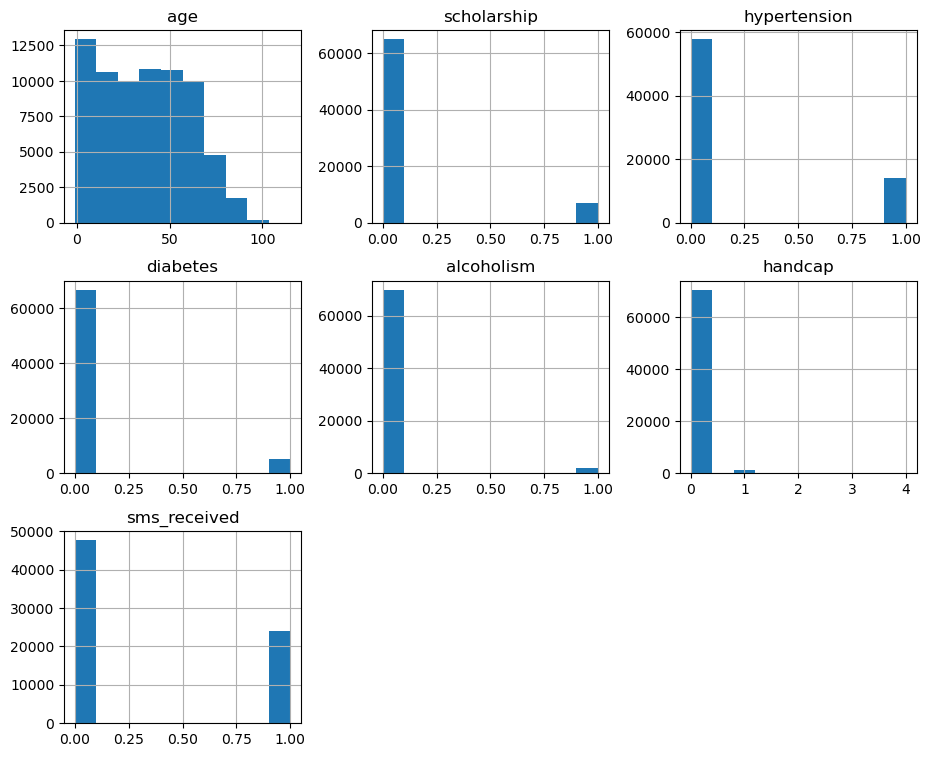

In [15]:
data_frame.hist(figsize=(11,9));

#### Dividing the patients into two groups according to showing or not, then exploring them

In [16]:
show = data_frame.no_show == "No"
data_frame[show].count()

gender          54154
age             54154
neighborhood    54154
scholarship     54154
hypertension    54154
diabetes        54154
alcoholism      54154
handcap         54154
sms_received    54154
no_show         54154
dtype: int64

In [17]:
no_show = data_frame.no_show == "Yes"
data_frame[no_show].count()

gender          17663
age             17663
neighborhood    17663
scholarship     17663
hypertension    17663
diabetes        17663
alcoholism      17663
handcap         17663
sms_received    17663
no_show         17663
dtype: int64

In [18]:
data_frame[show].mean()

C:\Users\Genius\AppData\Local\Temp\ipykernel_9316\2239368663.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frame[show].mean()


age             37.228460
scholarship      0.091332
hypertension     0.202940
diabetes         0.072866
alcoholism       0.023599
handcap          0.020903
sms_received     0.297226
dtype: float64

In [19]:
data_frame[no_show].mean()

C:\Users\Genius\AppData\Local\Temp\ipykernel_9316\1820218317.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frame[no_show].mean()


age             34.376267
scholarship      0.108419
hypertension     0.170922
diabetes         0.065108
alcoholism       0.029440
handcap          0.017777
sms_received     0.453094
dtype: float64

The mean age for show patients was almost  37, and no_show patients were 34 showed patients received sms less than no_show patients, so we have to revise our sms comparison.

### Looking into the elements that affect the attendance rate :

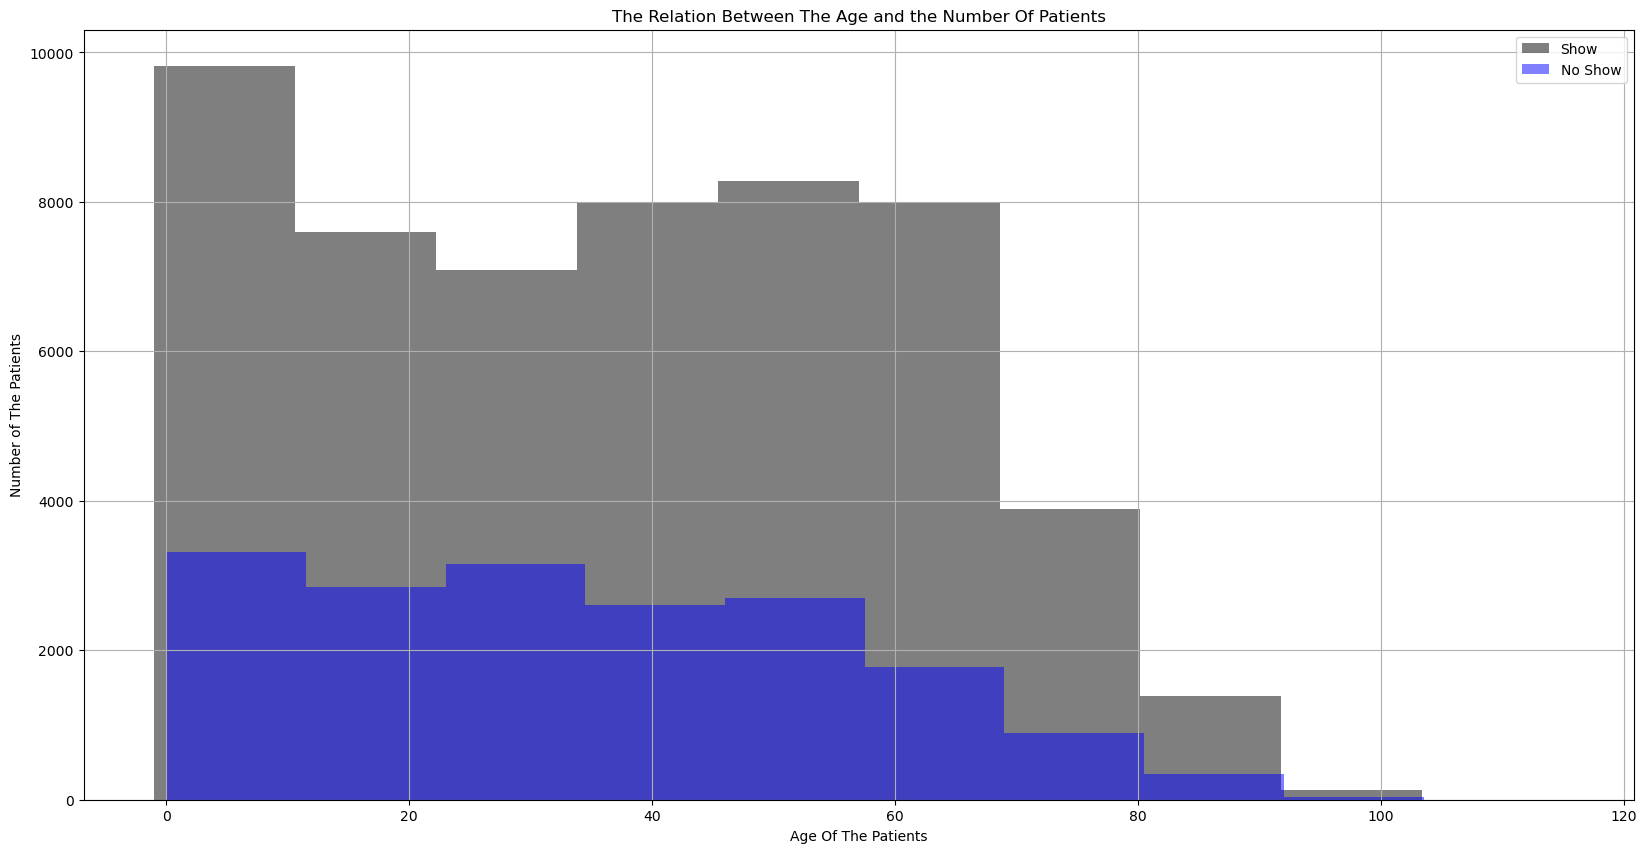

In [22]:
# Does the age affect the attendence?

def age_attend(data_frame,column_name,attended,absent):
    plt.figure(figsize=[20,10])
    
    data_frame[column_name][show].hist(alpha = .5, bins =10,color= "black",label= "Show")
    data_frame[column_name][no_show].hist(alpha=.5,bins= 10,color = "blue",label ="No Show")

    plt.legend();
    plt.title("The Relation Between The Age and the Number Of Patients")
    plt.xlabel("Age Of The Patients")
    plt.ylabel("Number of The Patients");

age_attend(data_frame,"age",show,no_show)

Ages from 0 to almost 10 are the most showing , then from nearly 46 to 57, and the least attending are those above 65.

Text(0, 0.5, 'Mean Age')

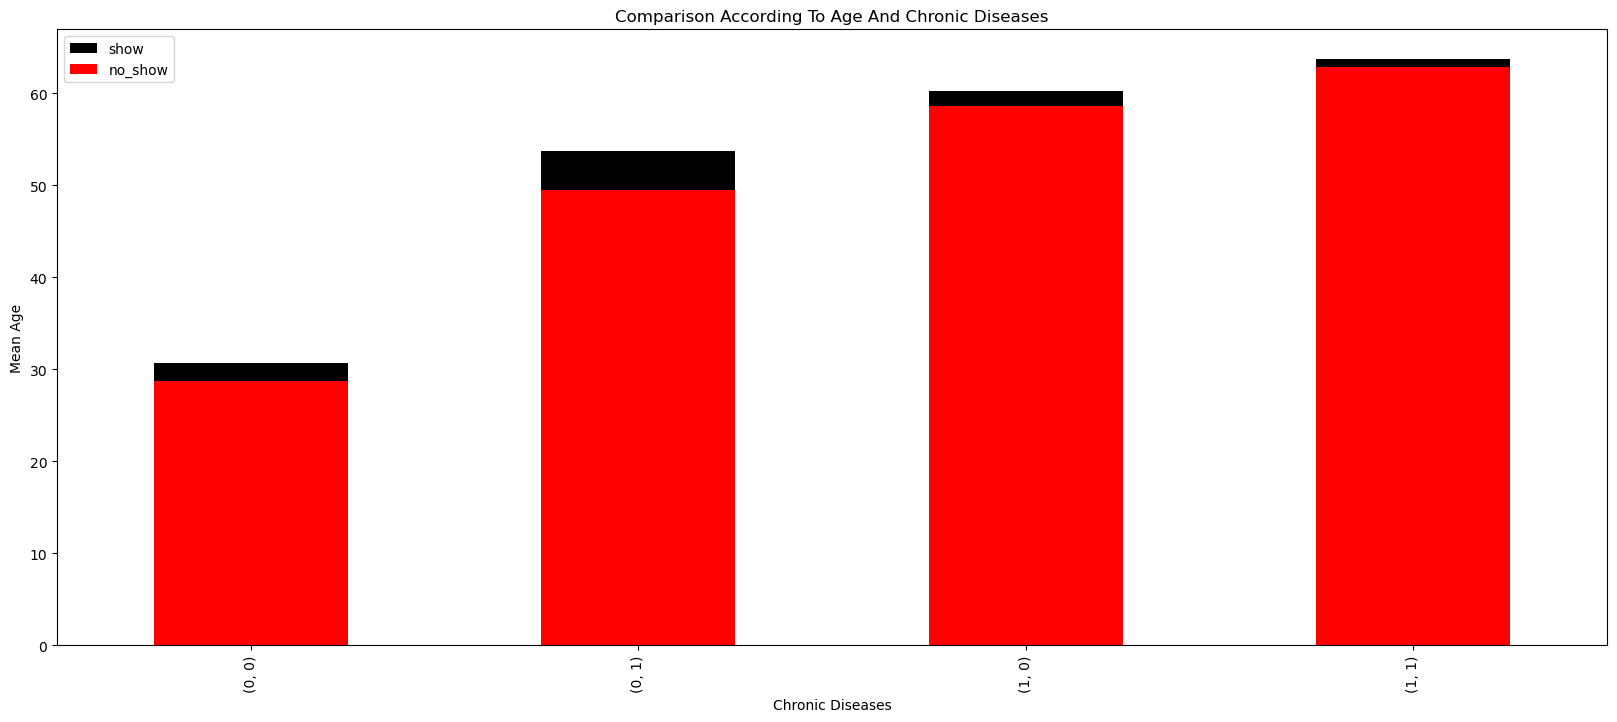

In [19]:
# Do age and chronic diseases affect attendance together:
plt.figure(figsize=[20,8])
data_frame[show].groupby(["hypertension","diabetes"]).mean()["age"].plot(kind="bar",color="black",label="show")
data_frame[no_show].groupby(["hypertension","diabetes"]).mean()["age"].plot(kind="bar",color="red",label="no_show")
plt.legend();
plt.title("Comparison According To Age And Chronic Diseases")
plt.xlabel("Chronic Diseases")
plt.ylabel("Mean Age")


In [20]:
data_frame[show].groupby(["hypertension","diabetes"]).mean()["age"],data_frame[no_show].groupby(["hypertension","diabetes"]).mean()["age"]

(hypertension  diabetes
 0             0           30.712613
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: age, dtype: float64,
 hypertension  diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: age, dtype: float64)

The average age of patients with non-chronic illnesses with symptoms is 30, while the average age of those without is 28. The average age of hypertensive diabetic patients displaying signs is 64, whereas the average age of those not is 63. This indicates a link between age and chronic diseases but not between chronic diseases and attendance.

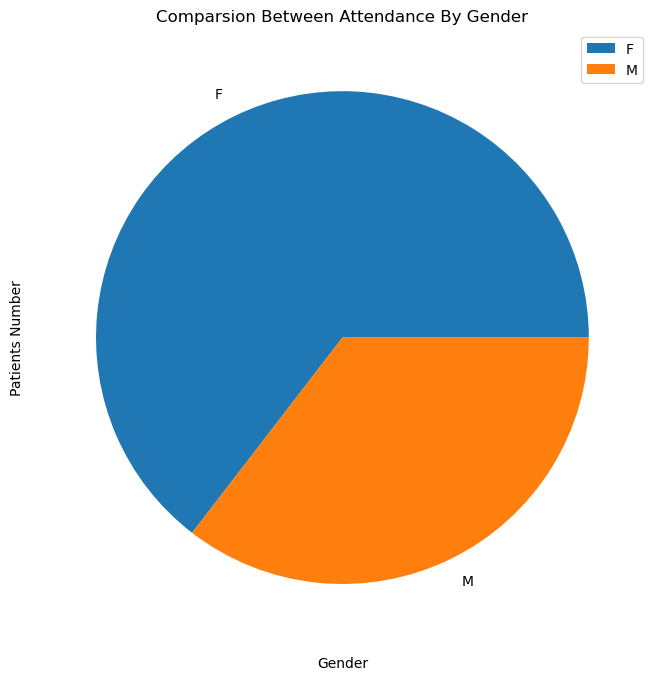

In [22]:
# Does gender affect the attendence?
def gender_attend(data_frame,column_name,attended,absent):
    plt.figure(figsize = [8,8])
    data_frame[column_name][show].value_counts(normalize = True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("Comparsion Between Attendance By Gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients Number");
gender_attend(data_frame,"gender",show,no_show)

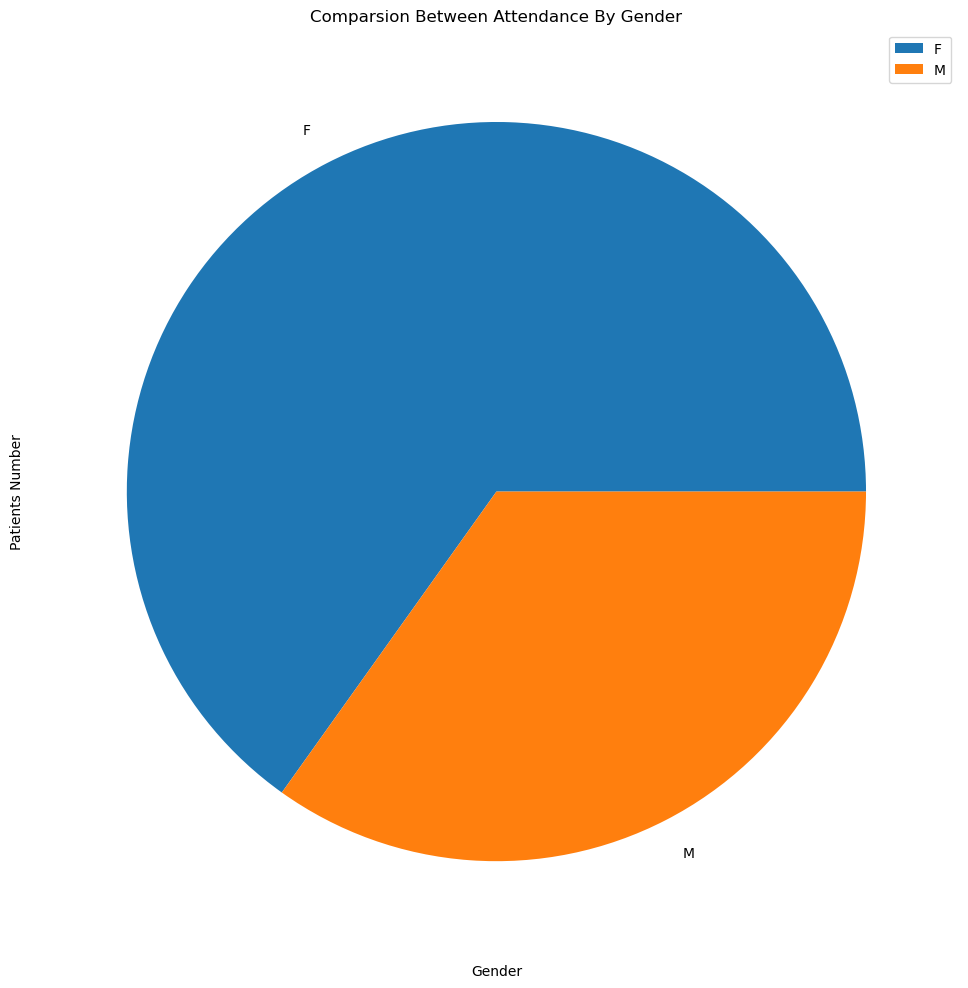

In [23]:
# What is the percentage of sex absent?
def sex_attend(data_frame,column_name,attended,absent):
    plt.figure(figsize = [12,12])
    data_frame[column_name][no_show].value_counts(normalize = True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("Comparsion Between Attendance By Gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients Number");
sex_attend(data_frame,"gender",show,no_show)

Gender has no apparent effect on attendance!

Text(0, 0.5, 'Mean Age')

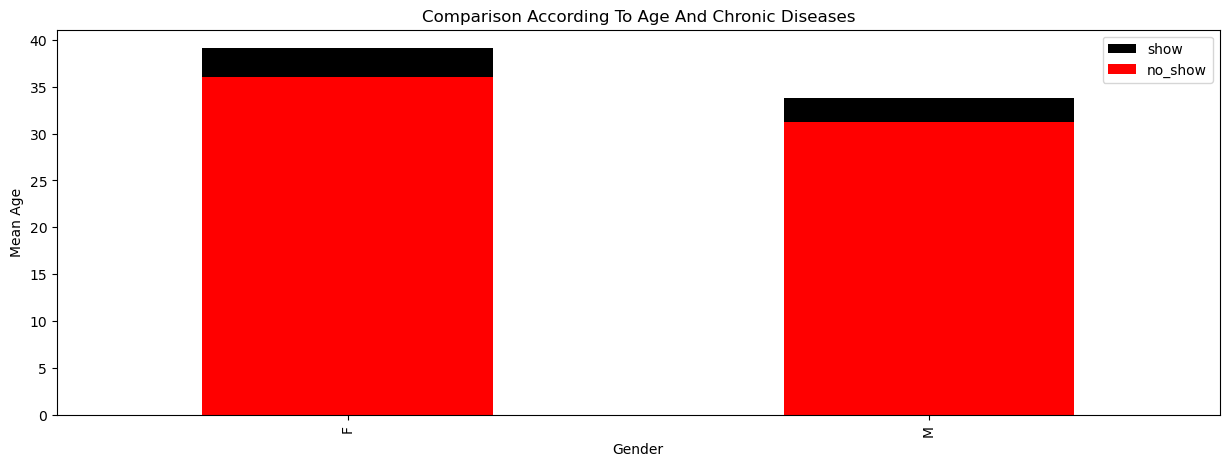

In [24]:
# Do age and chronic gender affect attendance together? (check by gender mean age)
plt.figure(figsize=[15,5])
data_frame[show].groupby(["gender"]).age.mean().plot(kind="bar",color="black",label="show")
data_frame[no_show].groupby(["gender"]).age.mean().plot(kind="bar",color="red",label="no_show")
plt.legend();
plt.title("Comparison According To Age And Chronic Diseases")
plt.xlabel("Gender")
plt.ylabel("Mean Age")

In [25]:
print(data_frame[show].groupby(["gender"]).age.mean(),data_frame[no_show].groupby(["gender"]).age.mean(),
data_frame[show].groupby(["gender"]).age.median(),data_frame[no_show].groupby(["gender"]).age.median())

gender
F    39.129144
M    33.766269
Name: age, dtype: float64 gender
F    36.06501
M    31.22040
Name: age, dtype: float64 gender
F    39.0
M    32.0
Name: age, dtype: float64 gender
F    34.0
M    29.0
Name: age, dtype: float64


There is no correlation between age and gender affecting the show rate; the mean and median of the sexes' ages are almost identical.

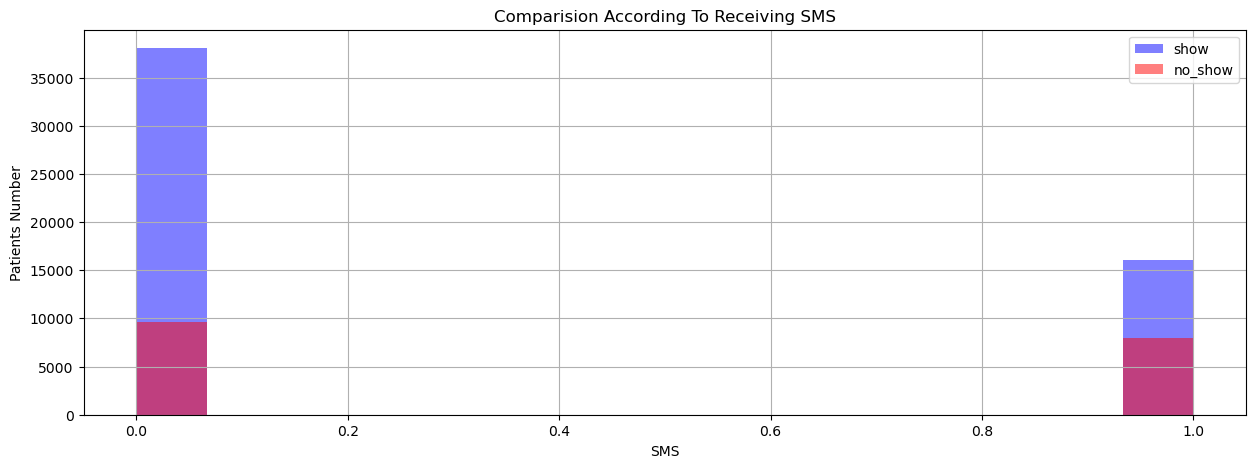

In [26]:
# Does receiving SMS affect attendance?
def sms_attend(data_frame,column_name,attended,absent):
    plt.figure(figsize=[15,5])
    data_frame[column_name][show].hist(alpha=.5,bins=15,color="blue",label="show");
    data_frame[column_name][no_show].hist(alpha=.5,bins=15,color="red",label = "no_show");
    plt.legend();
    plt.title("Comparision According To Receiving SMS")
    plt.xlabel("SMS")
    plt.ylabel("Patients Number");
sms_attend(data_frame,"sms_received",show,no_show)

The number of showing patients without receiving sms is more incredible than showing patients with receiving sms, which means we need to revisit our sms complaint.

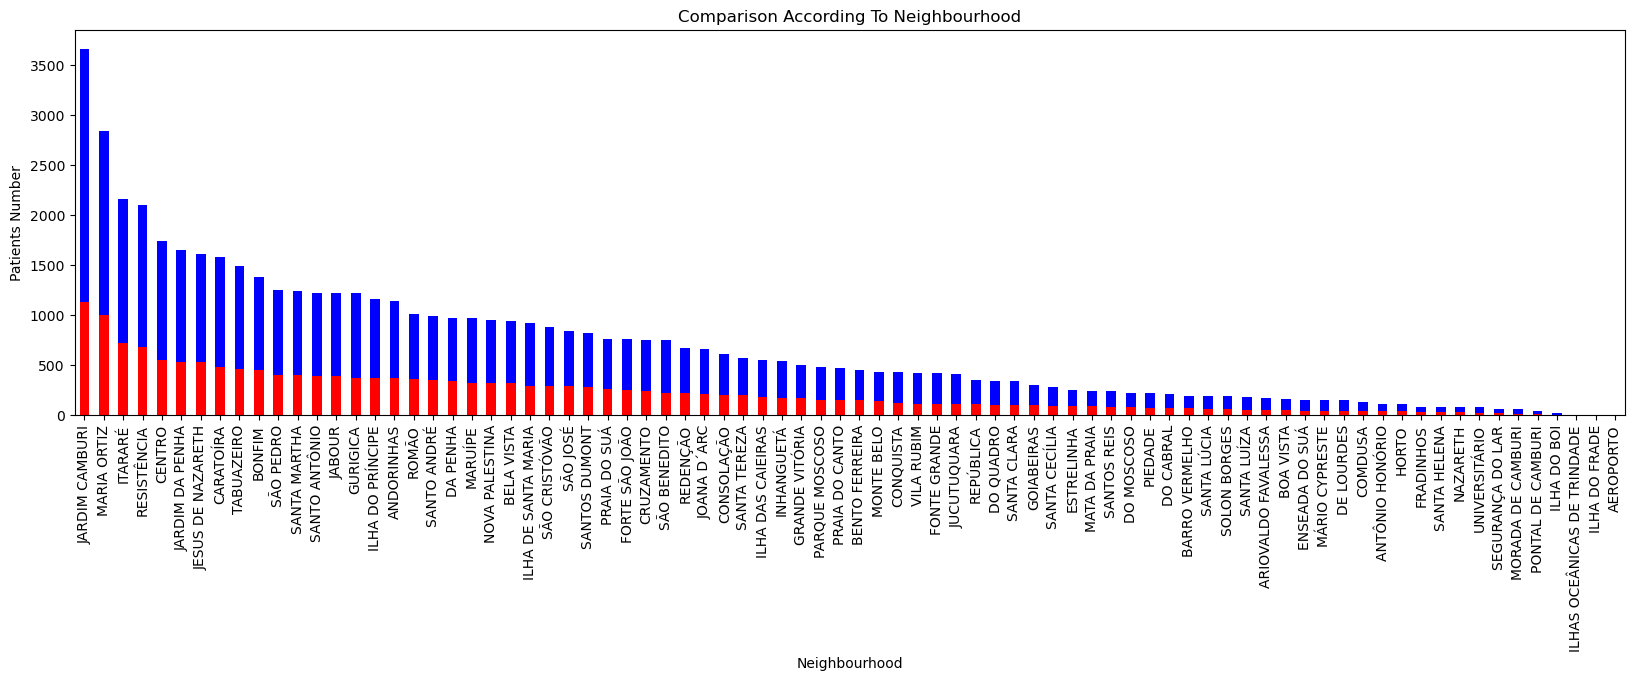

In [27]:
#  Does the neighborhood affect the attendance of patients?
plt.figure(figsize = [20,5])
data_frame.neighborhood[show].value_counts().plot(kind="bar",color="blue",label="show")
data_frame.neighborhood[no_show].value_counts().plot(kind="bar",color="red",label="Now show")
plt.title("Comparison According To Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients Number");

The neighborhood has a significant effect on attendance or not; JARDIM CAMBURI has the most significant number of patients and also has the most fantastic showing rate(attendance).

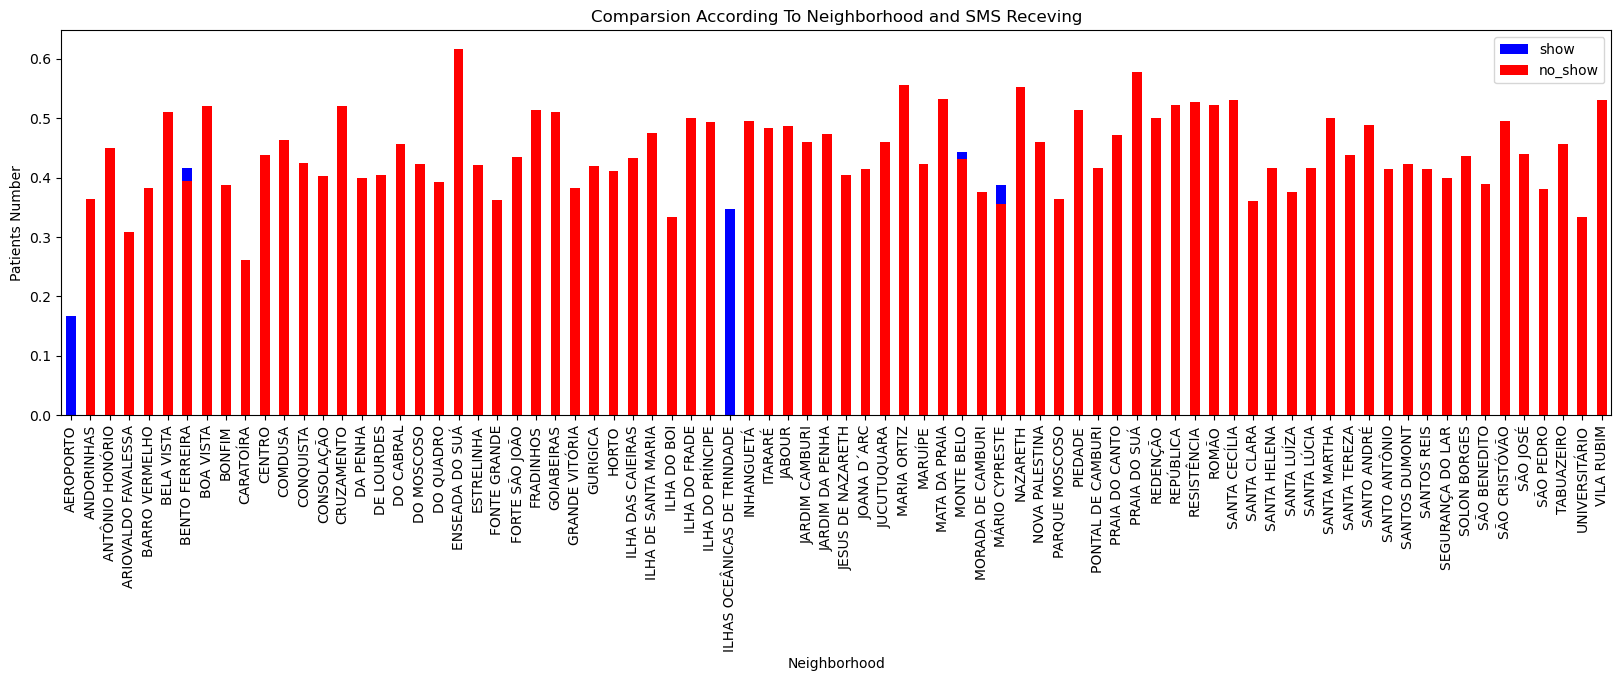

In [28]:
# Does the neighborhood only affect the patient's attendance, or is there an indirect variable?
plt.figure(figsize=[20,5])
data_frame[show].groupby("neighborhood").sms_received.mean().plot(kind="bar",color="blue",label="show")
data_frame[no_show].groupby("neighborhood").sms_received.mean().plot(kind="bar",color="red",label="no_show")
plt.legend()
plt.title("Comparsion According To Neighborhood and SMS Receving")
plt.xlabel("Neighborhood")
plt.ylabel("Patients Number");

SMS has a response in only five neighborhoods ILHAS OCEANICAS DE TRINDACE is the most responsive neighborhood to SMS.

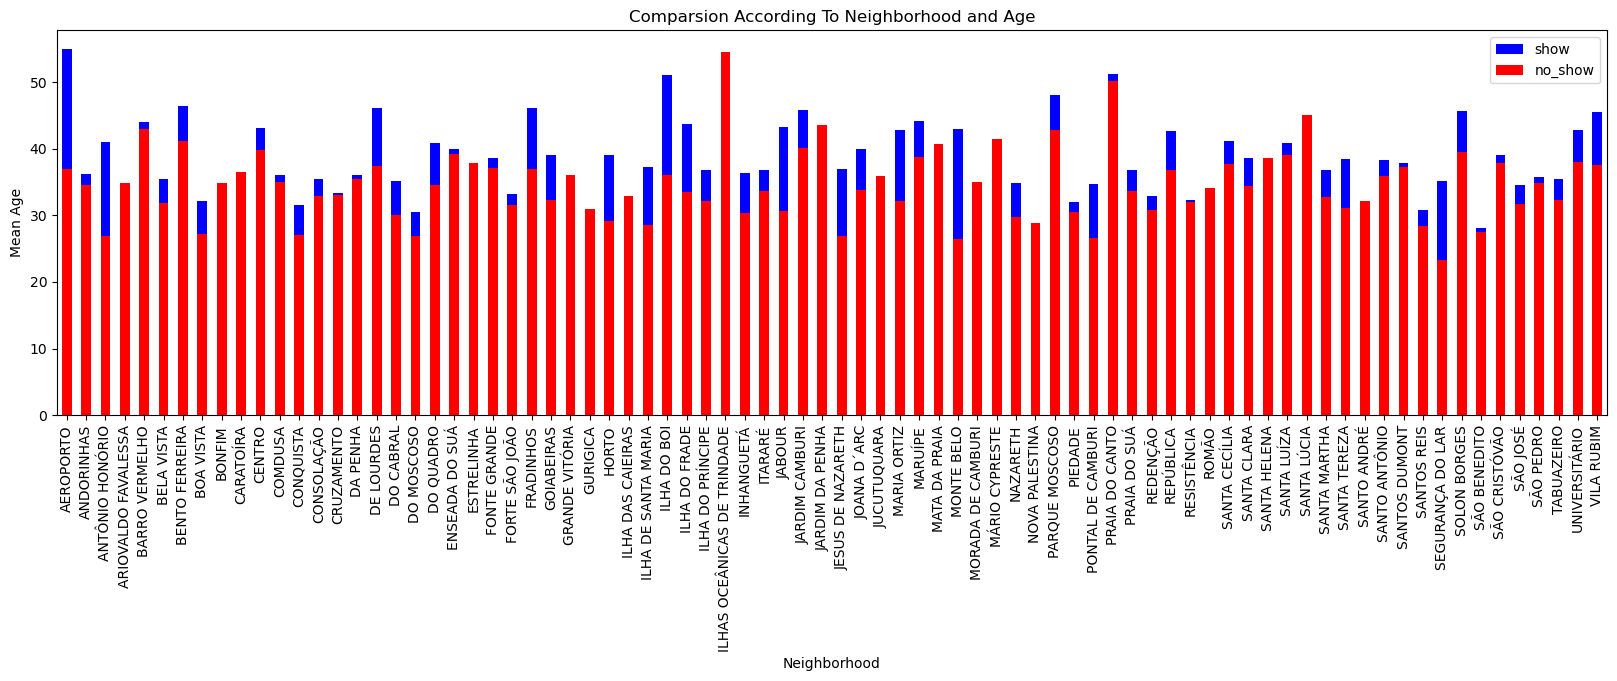

In [29]:
# 
plt.figure(figsize=[20,5])
data_frame[show].groupby("neighborhood").age.mean().plot(kind="bar",color="blue",label="show")
data_frame[no_show].groupby("neighborhood").age.mean().plot(kind="bar",color="red",label="no_show")
plt.legend()
plt.title("Comparsion According To Neighborhood and Age")
plt.xlabel("Neighborhood")
plt.ylabel("Mean Age");

Patients' attendance from specific neighborhoods differs according to age AEROPORTO the LIHA DO BOI are with high ages attendance.

<a id='conclusions'></a>
## Conclusions
The neighborhood has an excellent effect on attendance. JARDIM CAMBURI has the greatest number of patients and also has the most significant showing rate.

It depends on The number of showing patients from specific neighborhoods affected by receiving SMS and their Ages.

Age has an apparent influence on the showing rate age from 0 to 9 is the most showing (parents taking care of their kids), then from 45 to 55, and their least attending are those above 65 years old.

The number of showing patients without receiving sms is more significant than showing patients with receiving sms, which means that we need to revisit our sms campaign

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'no_show_appointments'])


4294967295

In [10]:
def show_plus_ten(num):
    print(num + 10)

show_plus_ten(5)




15


In [ ]:
# that function is used to draw the plot
def countplot(col, xlabel, ylabel, title):
    count = col.value_counts()
    plt.bar(count, count.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [ ]:
def display_plot(df, col, title, xlabel, ylabel):
"""
df: the dataframe you want to plot from
col: the plotted column
[title, xlabel, ylabel]: plot settings
"""
    plt.figure(figsize=(8,8))
    plt.hist(df[col].tolist())
    plt.hist(df[col].tolist())
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xlabel(xlabel)
    return plt.show()